# MLR:



Assignment Task:

Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.
    
Dataset Description:
    
The dataset consists of the following variables:
    
Age: Age in years

KM: Accumulated Kilometers on odometer

FuelType: Fuel Type (Petrol, Diesel, CNG)

HP: Horse Power

Automatic: Automatic ( (Yes=1, No=0)

CC: Cylinder Volume in cubic centimeters

Doors: Number of doors

Weight: Weight in Kilograms

Quarterly_Tax: 

Price: Offer Price in EUROs

Taskes:

1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

5.Apply Lasso and Ridge methods on the model.

Interview Questions:

1.What is Normalization & Standardization and how is it helpful?

2.What techniques can be used to address multicollinearity in multiple linear regression?


Ensure to properly comment your code and provide explanations for your analysis.

Include any assumptions made during the analysis and discuss their implications.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df=pd.read_csv("C:\\DS assignments\\ToyotaCorolla - MLR.csv")
df


Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3             4      5    1165  
4             4      5    1170  
...         ...    ...     ...  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114  

[1436 rows x 11 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:
#check for missing values

df.isna().sum()
print(df.isnull().sum())


Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [5]:
#defining numerical columns
numerical_columns = df.select_dtypes(include='number').columns
numerical_columns


Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')

# EDA

# Histograms

1.7038849799952995

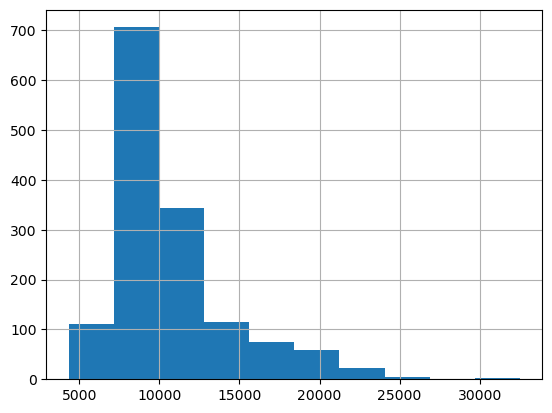

In [7]:
#histograms
df["Price"].hist()
df["Price"].skew()

-0.82670187309842

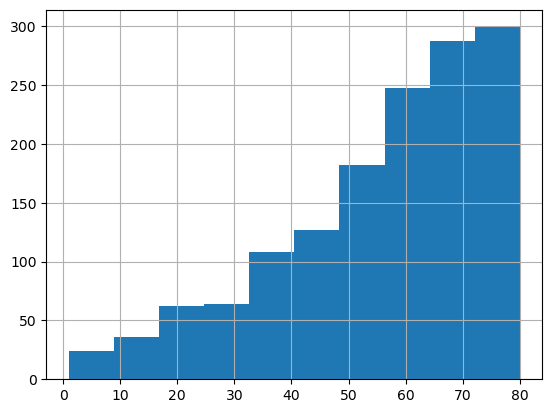

In [8]:
df["Age_08_04"].hist()
df["Age_08_04"].skew()

1.0159121980877577

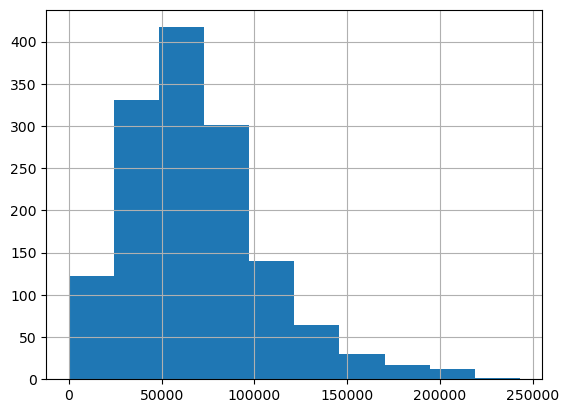

In [9]:
df["KM"].hist()
df["KM"].skew()

-2.849715775684074

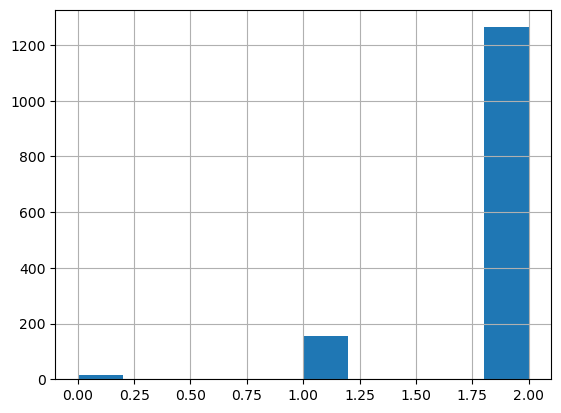

In [12]:
df["Fuel_Type"].hist()
df["Fuel_Type"].skew()

0.9558356472519488

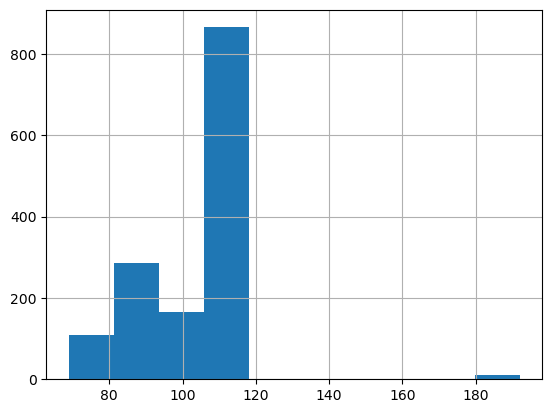

In [13]:
df["HP"].hist()
df["HP"].skew()

3.878196903617749

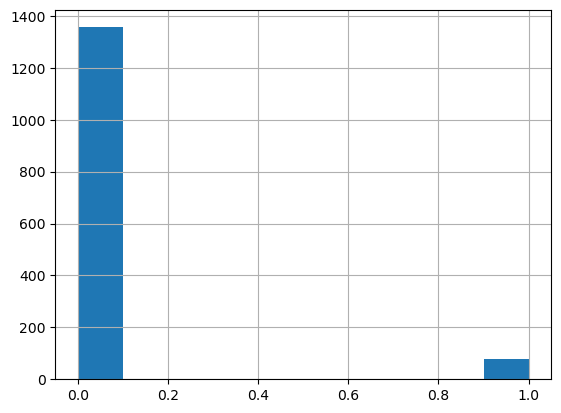

In [14]:
df["Automatic"].hist()
df["Automatic"].skew()

27.431792795981686

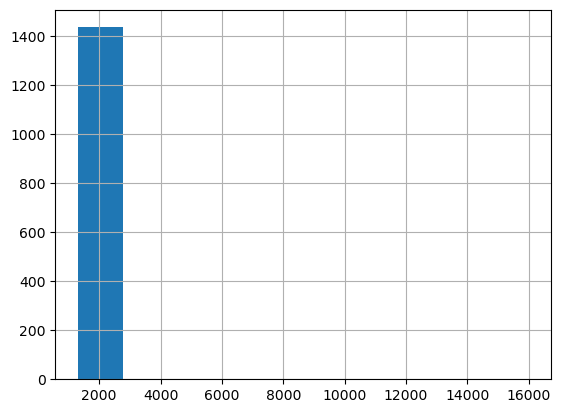

In [15]:
df["cc"].hist()
df["cc"].skew()

-0.07639499290452467

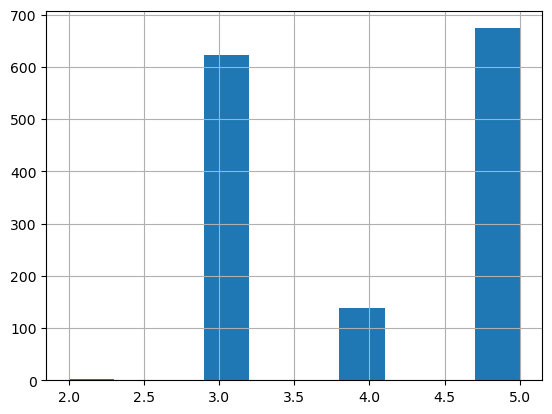

In [16]:
df["Doors"].hist()
df["Doors"].skew()

0.0

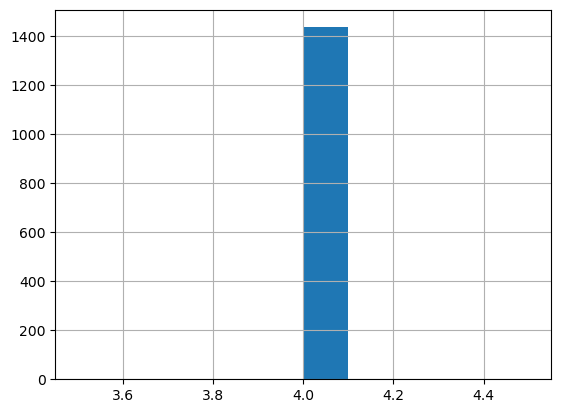

In [17]:
df["Cylinders"].hist()
df["Cylinders"].skew()

2.283959738160194

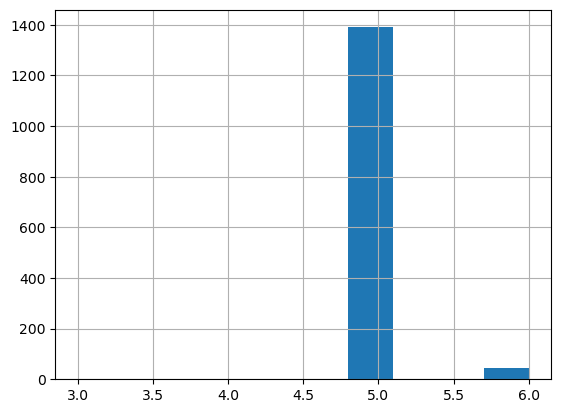

In [18]:
df["Gears"].hist()
df["Gears"].skew()

3.108639394626062

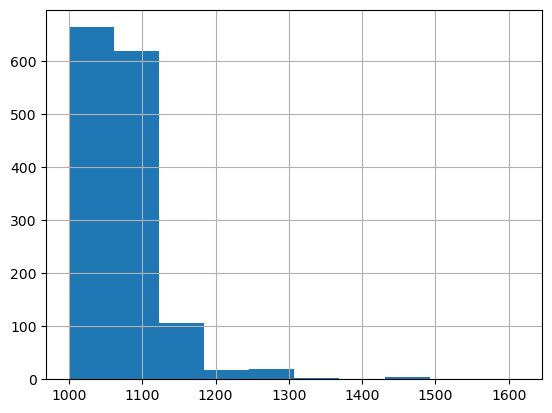

In [19]:
df["Weight"].hist()
df["Weight"].skew()

# Boxplots

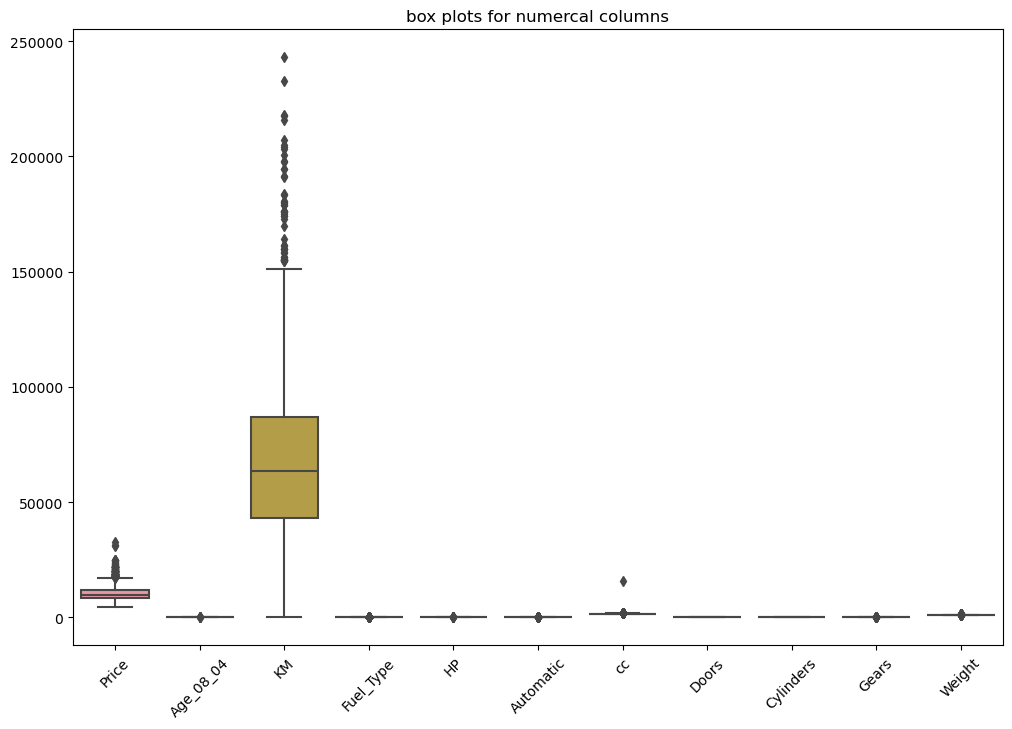

In [20]:
numerical_columns = df.select_dtypes(include='number').columns
numerical_columns
plt.figure(figsize=(12,8))
sns.boxplot(data=df[numerical_columns])
plt.title("box plots for numercal columns")
plt.xticks(rotation=45)
plt.show()


In [21]:
#checking for duplicates and removing that duplicates

duplicate_rows = df[df.duplicated()]

df = df.drop_duplicates()

print(f"Number of duplicate rows: {len(duplicate_rows)}")


Number of duplicate rows: 1


In [22]:
df[df.duplicated()]


Empty DataFrame
Columns: [Price, Age_08_04, KM, Fuel_Type, HP, Automatic, cc, Doors, Cylinders, Gears, Weight]
Index: []

In [24]:
#data transformation

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["Fuel_Type"] = LE.fit_transform(df["Fuel_Type"])
df


C:\Users\Abhinay\AppData\Local\Temp\ipykernel_3512\296227492.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Fuel_Type"] = LE.fit_transform(df["Fuel_Type"])


Price  Age_08_04     KM  Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986          1   90          0  2000      3   
1     13750         23  72937          1   90          0  2000      3   
2     13950         24  41711          1   90          0  2000      3   
3     14950         26  48000          1   90          0  2000      3   
4     13750         30  38500          1   90          0  2000      3   
...     ...        ...    ...        ...  ...        ...   ...    ...   
1431   7500         69  20544          2   86          0  1300      3   
1432  10845         72  19000          2   86          0  1300      3   
1433   8500         71  17016          2   86          0  1300      3   
1434   7250         70  16916          2   86          0  1300      3   
1435   6950         76      1          2  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3             4      5    1165  
4             4      5    1170  
...         ...    ...     ...  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114  

[1435 rows x 11 columns]

# correlation

In [25]:
df.corr()

Price  Age_08_04        KM  Fuel_Type        HP  Automatic  \
Price      1.000000  -0.876273 -0.569420  -0.015883  0.314134   0.033928   
Age_08_04 -0.876273   1.000000  0.504575   0.076382 -0.155293   0.031354   
KM        -0.569420   0.504575  1.000000  -0.424118 -0.332904  -0.082168   
Fuel_Type -0.015883   0.076382 -0.424118   1.000000  0.411973   0.069456   
HP         0.314134  -0.155293 -0.332904   0.411973  1.000000   0.013313   
Automatic  0.033928   0.031354 -0.082168   0.069456  0.013313   1.000000   
cc         0.124375  -0.096549  0.103822  -0.276236  0.035207   0.066934   
Doors      0.183604  -0.146929 -0.035193  -0.025339  0.091803  -0.027492   
Cylinders       NaN        NaN       NaN        NaN       NaN        NaN   
Gears      0.063831  -0.005629  0.014890   0.069560  0.209642  -0.098582   
Weight     0.575869  -0.466484 -0.023969  -0.502479  0.087143   0.058499   

                 cc     Doors  Cylinders     Gears    Weight  
Price      0.124375  0.183604        NaN  0.063831  0.575869  
Age_08_04 -0.096549 -0.146929        NaN -0.005629 -0.466484  
KM         0.103822 -0.035193        NaN  0.014890 -0.023969  
Fuel_Type -0.276236 -0.025339        NaN  0.069560 -0.502479  
HP         0.035207  0.091803        NaN  0.209642  0.087143  
Automatic  0.066934 -0.027492        NaN -0.098582  0.058499  
cc         1.000000  0.079254        NaN  0.014732  0.335077  
Doors      0.079254  1.000000        NaN -0.160101  0.301734  
Cylinders       NaN       NaN        NaN       NaN       NaN  
Gears      0.014732 -0.160101        NaN  1.000000  0.021238  
Weight     0.335077  0.301734        NaN  0.021238  1.000000

# 1ST MODEL

In [43]:
#define x and y taking all x varibles
y=df["Price"]
x=df[["Age_08_04","KM","Fuel_Type","Weight","HP","Doors","cc","Gears","Automatic"]]
x.head()
df

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_ss=ss.fit_transform(x)
x_ss

pd.DataFrame(x_ss)

x_ss=pd.DataFrame(x_ss)
x_ss
#giving column names

x_ss.columns=list(x)
x_ss



#data partition
y=df["Price"]
x=x_ss


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=499)
x_train
#import the model

from sklearn.linear_model import LinearRegression
LR=LinearRegression()

#fit the model

LR.fit(x_train,y_train)

#predictions


y_pred_train=LR.predict(x_train)
y_pred_test=LR.predict(x_test)

#RMSE
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
ac1=np.sqrt(mean_squared_error(y_train, y_pred_train))
print("training error :",ac1.round(2))
ac2=np.sqrt(mean_squared_error(y_test,y_pred_test))
print("test error :",ac2.round(2))
print(r2_score(y_train, y_pred_train).round(2))
print(r2_score(y_test, y_pred_test).round(2))
#cross validation method

training_error=[]
test_error=[]
training_acc=[]
test_acc=[]


for i in range(0,500,1):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    y_pred_train=LR.predict(x_train)
    y_pred_test=LR.predict(x_test)
    training_acc.append(r2_score(y_train, y_pred_train))
    test_acc.append(r2_score(y_test, y_pred_test))

    training_error.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
 

print("training error :",np.mean(training_error).round(2))
print("test error:",np.mean(test_error).round(2))
print("traning accuracy:",np.mean(training_acc).round(2))
print("test accuracy:",np.mean(test_acc).round(2))


training error : 1174.44
test error : 3280.45
0.89
0.32
training error : 1324.64
test error: 1469.81
traning accuracy: 0.87
test accuracy: 0.83


In [27]:
#multicollinearity

y=df["Age_08_04"]
x=df[["KM","Fuel_Type","Weight","HP","Doors","cc","Gears","Automatic"]]

from sklearn.linear_model import LinearRegression
LR=LinearRegression()

#now fit the model

LR.fit(x,y)

#bias(c)
LR.intercept_

#cofficient(slope)

LR.coef_


#predictions for all points

y_pred=LR.predict(x)
y_pred

#now see MSE and RMSE and R_square and VIF

from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y, y_pred)
mse=mse.round(2)
rmse=np.sqrt(mse).round(2)
rmse
r2=r2_score(y,y_pred).round(2)
r2
vif=1/(1-r2)
print("VIF:",vif)


VIF: 1.923076923076923


# 2ND MODEL

In [28]:

x=df[["Age_08_04"]]
y=df["Price"]


from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_ss=ss.fit_transform(x)
x_ss

pd.DataFrame(x_ss)

x_ss=pd.DataFrame(x_ss)
x_ss
#giving column names

x_ss.columns=list(x)
x_ss


x=df[["Age_08_04"]]
y=df["Price"]


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=499)
x_train
#import the model

from sklearn.linear_model import LinearRegression
LR=LinearRegression()

#fit the model

LR.fit(x_train,y_train)

#predictions


y_pred_train=LR.predict(x_train)
y_pred_test=LR.predict(x_test)

#RMSE
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
ac1=np.sqrt(mean_squared_error(y_train, y_pred_train))
print("training error :",ac1.round(2))
ac2=np.sqrt(mean_squared_error(y_test,y_pred_test))
print("test error :",ac2.round(2))
print(r2_score(y_train, y_pred_train).round(2))
print(r2_score(y_test, y_pred_test).round(2))
#cross validation method

training_error=[]
test_error=[]
training_acc=[]
test_acc=[]


for i in range(0,500,1):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    y_pred_train=LR.predict(x_train)
    y_pred_test=LR.predict(x_test)
    training_acc.append(r2_score(y_train, y_pred_train))
    test_acc.append(r2_score(y_test, y_pred_test))

    training_error.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
 

print("training error :",np.mean(training_error).round(2))
print("test error:",np.mean(test_error).round(2))
print("traning accuracy:",np.mean(training_acc).round(2))
print("test accuracy:",np.mean(test_acc).round(2))


training error : 1700.75
test error : 1894.84
0.76
0.77
training error : 1735.77
test error: 1743.41
traning accuracy: 0.77
test accuracy: 0.76


# 3RD MODEL

In [29]:

y=df["Price"]
x=df[["Age_08_04","KM"]]

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_ss=ss.fit_transform(x)
x_ss

pd.DataFrame(x_ss)

x_ss=pd.DataFrame(x_ss)
x_ss
#giving column names

x_ss.columns=list(x)
x_ss


x=df[["Age_08_04","KM"]]
y=df["Price"]


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=499)
x_train
#import the model

from sklearn.linear_model import LinearRegression
LR=LinearRegression()

#fit the model

LR.fit(x_train,y_train)

#predictions


y_pred_train=LR.predict(x_train)
y_pred_test=LR.predict(x_test)

#RMSE
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
ac1=np.sqrt(mean_squared_error(y_train, y_pred_train))
print("training error :",ac1.round(2))
ac2=np.sqrt(mean_squared_error(y_test,y_pred_test))
print("test error :",ac2.round(2))
print(r2_score(y_train, y_pred_train).round(2))
print(r2_score(y_test, y_pred_test).round(2))
#cross validation method

training_error=[]
test_error=[]
training_acc=[]
test_acc=[]


for i in range(0,500,1):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    y_pred_train=LR.predict(x_train)
    y_pred_test=LR.predict(x_test)
    training_acc.append(r2_score(y_train, y_pred_train))
    test_acc.append(r2_score(y_test, y_pred_test))

    training_error.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
 

print("training error :",np.mean(training_error).round(2))
print("test error:",np.mean(test_error).round(2))
print("traning accuracy:",np.mean(training_acc).round(2))
print("test accuracy:",np.mean(test_acc).round(2))


training error : 1603.86
test error : 1859.3
0.79
0.78
training error : 1652.52
test error: 1660.38
traning accuracy: 0.79
test accuracy: 0.79


In [30]:
#multicollinertiy 

x=df[["Age_08_04"]]
y=df["KM"]

from sklearn.linear_model import LinearRegression
LR=LinearRegression()

#now fit the model

LR.fit(x,y)

#bias(c)
LR.intercept_

#cofficient(slope)

LR.coef_


#predictions for all points

y_pred=LR.predict(x)
y_pred

#now see MSE and RMSE and R_square and VIF

from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y, y_pred)
mse=mse.round(2)
rmse=np.sqrt(mse).round(2)
rmse
r2=r2_score(y,y_pred).round(2)
r2
vif=1/(1-r2)
print("VIF:",vif)



VIF: 1.3333333333333333


# 4TH MODEL

In [31]:

y=df["Price"]
x=df[["Age_08_04","KM","Fuel_Type","Weight","HP","Gears"]]

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_ss=ss.fit_transform(x)
x_ss

pd.DataFrame(x_ss)

x_ss=pd.DataFrame(x_ss)
x_ss
#giving column names

x_ss.columns=list(x)
x_ss


x=df[["Age_08_04","KM","Fuel_Type","Weight","HP","Gears"]]
y=df["Price"]


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=499)
x_train
#import the model

from sklearn.linear_model import LinearRegression
LR=LinearRegression()

#fit the model

LR.fit(x_train,y_train)

#predictions


y_pred_train=LR.predict(x_train)
y_pred_test=LR.predict(x_test)

#RMSE
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
ac1=np.sqrt(mean_squared_error(y_train, y_pred_train))
print("training error :",ac1.round(2))
ac2=np.sqrt(mean_squared_error(y_test,y_pred_test))
print("test error :",ac2.round(2))
print(r2_score(y_train, y_pred_train).round(2))
print(r2_score(y_test, y_pred_test).round(2))
#cross validation method

training_error=[]
test_error=[]
training_acc=[]
test_acc=[]


for i in range(0,500,1):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    y_pred_train=LR.predict(x_train)
    y_pred_test=LR.predict(x_test)
    training_acc.append(r2_score(y_train, y_pred_train))
    test_acc.append(r2_score(y_test, y_pred_test))

    training_error.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
 

print("training error :",np.mean(training_error).round(2))
print("test error:",np.mean(test_error).round(2))
print("traning accuracy:",np.mean(training_acc).round(2))
print("test accuracy:",np.mean(test_acc).round(2))



training error : 1225.39
test error : 1788.5
0.88
0.8
training error : 1329.55
test error: 1360.82
traning accuracy: 0.86
test accuracy: 0.85


In [32]:
#multicollinerty
x=df[["KM","Fuel_Type","Weight","HP","Gears"]]
y=df["Age_08_04"]

from sklearn.linear_model import LinearRegression
LR=LinearRegression()

#now fit the model

LR.fit(x,y)

#bias(c)
LR.intercept_

#cofficient(slope)

LR.coef_


#predictions for all points

y_pred=LR.predict(x)
y_pred

#now see MSE and RMSE and R_square and VIF

from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y, y_pred)
mse=mse.round(2)
rmse=np.sqrt(mse).round(2)
rmse
r2=r2_score(y,y_pred).round(2)
r2
vif=1/(1-r2)
print("VIF:",vif)



VIF: 1.8867924528301885


# 5TH MODEL

In [33]:
y=df["Price"]
x=df[["Age_08_04","KM","Fuel_Type","Weight","HP"]]

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_ss=ss.fit_transform(x)
x_ss

pd.DataFrame(x_ss)

x_ss=pd.DataFrame(x_ss)
x_ss
#giving column names

x_ss.columns=list(x)
x_ss


x=df[["Age_08_04","KM","Fuel_Type","Weight","HP"]]
y=df["Price"]


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=499)
x_train
#import the model

from sklearn.linear_model import LinearRegression
LR=LinearRegression()

#fit the model

LR.fit(x_train,y_train)

#predictions


y_pred_train=LR.predict(x_train)
y_pred_test=LR.predict(x_test)

#RMSE
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
ac1=np.sqrt(mean_squared_error(y_train, y_pred_train))
print("training error :",ac1.round(2))
ac2=np.sqrt(mean_squared_error(y_test,y_pred_test))
print("test error :",ac2.round(2))
print(r2_score(y_train, y_pred_train).round(2))
print(r2_score(y_test, y_pred_test).round(2))
#cross validation method

training_error=[]
test_error=[]
training_acc=[]
test_acc=[]


for i in range(0,500,1):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    y_pred_train=LR.predict(x_train)
    y_pred_test=LR.predict(x_test)
    training_acc.append(r2_score(y_train, y_pred_train))
    test_acc.append(r2_score(y_test, y_pred_test))

    training_error.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
 
print("training error :",np.mean(training_error).round(2))
print("test error:",np.mean(test_error).round(2))
print("traning accuracy:",np.mean(training_acc).round(2))
print("test accuracy:",np.mean(test_acc).round(2))



training error : 1232.02
test error : 1786.51
0.88
0.8
training error : 1334.41
test error: 1365.04
traning accuracy: 0.86
test accuracy: 0.85


In [34]:
#multicollinearity
x=df[["KM","Fuel_Type","Weight","HP"]]
y=df["Age_08_04"]

from sklearn.linear_model import LinearRegression
LR=LinearRegression()

#now fit the model

LR.fit(x,y)

#bias(c)
LR.intercept_

#cofficient(slope)

LR.coef_


#predictions for all points

y_pred=LR.predict(x)
y_pred

#now see MSE and RMSE and R_square and VIF

from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y, y_pred)
mse=mse.round(2)
rmse=np.sqrt(mse).round(2)
rmse
r2=r2_score(y,y_pred).round(2)
r2
vif=1/(1-r2)
print("VIF:",vif)



VIF: 1.8867924528301885


# 6TH MODEL

In [35]:
x=df[["Age_08_04","KM","Weight","HP"]]
y=df["Price"]

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_ss=ss.fit_transform(x)
x_ss

pd.DataFrame(x_ss)

x_ss=pd.DataFrame(x_ss)
x_ss
#giving column names

x_ss.columns=list(x)
x_ss


x=df[["Age_08_04","KM","Weight","HP"]]
y=df["Price"]


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=499)
x_train
#import the model

from sklearn.linear_model import LinearRegression
LR=LinearRegression()

#fit the model

LR.fit(x_train,y_train)

#predictions


y_pred_train=LR.predict(x_train)
y_pred_test=LR.predict(x_test)

#RMSE
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
ac1=np.sqrt(mean_squared_error(y_train, y_pred_train))
print("training error :",ac1.round(2))
ac2=np.sqrt(mean_squared_error(y_test,y_pred_test))
print("test error :",ac2.round(2))
print(r2_score(y_train, y_pred_train).round(2))
print(r2_score(y_test, y_pred_test).round(2))
#cross validation method

training_error=[]
test_error=[]
training_acc=[]
test_acc=[]


for i in range(0,500,1):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    y_pred_train=LR.predict(x_train)
    y_pred_test=LR.predict(x_test)
    training_acc.append(r2_score(y_train, y_pred_train))
    test_acc.append(r2_score(y_test, y_pred_test))

    training_error.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
 
print("training error :",np.mean(training_error).round(2))
print("test error:",np.mean(test_error).round(2))
print("traning accuracy:",np.mean(training_acc).round(2))
print("test accuracy:",np.mean(test_acc).round(2))



training error : 1257.17
test error : 1707.82
0.87
0.82
training error : 1343.99
test error: 1365.03
traning accuracy: 0.86
test accuracy: 0.85


In [36]:
#multicollinearity
x=df[["KM","Weight","HP"]]
y=df["Age_08_04"]

from sklearn.linear_model import LinearRegression
LR=LinearRegression()

#now fit the model

LR.fit(x,y)

#bias(c)
LR.intercept_

#cofficient(slope)

LR.coef_


#predictions for all points

y_pred=LR.predict(x)
y_pred

#now see MSE and RMSE and R_square and VIF

from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y, y_pred)
mse=mse.round(2)
rmse=np.sqrt(mse).round(2)
rmse
r2=r2_score(y,y_pred).round(2)
r2
vif=1/(1-r2)
print("VIF:",vif)



VIF: 1.8518518518518516


# 7TH MODEL

In [37]:

x=df[["Age_08_04","KM","Weight"]]
y=df["Price"]

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_ss=ss.fit_transform(x)
x_ss

pd.DataFrame(x_ss)

x_ss=pd.DataFrame(x_ss)
x_ss
#giving column names

x_ss.columns=list(x)
x_ss


x=df[["Age_08_04","KM","Weight"]]
y=df["Price"]


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=499)
x_train
#import the model

from sklearn.linear_model import LinearRegression
LR=LinearRegression()

#fit the model

LR.fit(x_train,y_train)

#predictions


y_pred_train=LR.predict(x_train)
y_pred_test=LR.predict(x_test)

#RMSE
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
ac1=np.sqrt(mean_squared_error(y_train, y_pred_train))
print("training error :",ac1.round(2))
ac2=np.sqrt(mean_squared_error(y_test,y_pred_test))
print("test error :",ac2.round(2))
print(r2_score(y_train, y_pred_train).round(2))
print(r2_score(y_test, y_pred_test).round(2))
#cross validation method

training_error=[]
test_error=[]
training_acc=[]
test_acc=[]


for i in range(0,500,1):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    y_pred_train=LR.predict(x_train)
    y_pred_test=LR.predict(x_test)
    training_acc.append(r2_score(y_train, y_pred_train))
    test_acc.append(r2_score(y_test, y_pred_test))

    training_error.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
 

print("training error :",np.mean(training_error).round(2))
print("test error:",np.mean(test_error).round(2))
print("traning accuracy:",np.mean(training_acc).round(2))
print("test accuracy:",np.mean(test_acc).round(2))


training error : 1325.29
test error : 1774.19
0.86
0.8
training error : 1408.61
test error: 1431.02
traning accuracy: 0.85
test accuracy: 0.84


In [38]:
#multicollinearity
x=df[["KM","Weight"]]
y=df["Age_08_04"]

from sklearn.linear_model import LinearRegression
LR=LinearRegression()

#now fit the model

LR.fit(x,y)

#bias(c)
LR.intercept_

#cofficient(slope)

LR.coef_


#predictions for all points

y_pred=LR.predict(x)
y_pred

#now see MSE and RMSE and R_square and VIF

from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y, y_pred)
mse=mse.round(2)
rmse=np.sqrt(mse).round(2)
rmse
r2=r2_score(y,y_pred).round(2)
r2
vif=1/(1-r2)
print("VIF:",vif)



VIF: 1.8518518518518516


# Regularizaton

# Applaying Lasso Regression

# Lasso model_1

In [44]:
# for alpha =100
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ss,y,test_size=0.2,random_state=499)

LR.coef_
df_coef=pd.concat([pd.DataFrame(list(x_ss)),pd.DataFrame(LR.coef_)],axis=1)
df_coef

from sklearn.linear_model import Lasso

x_ss_train,x_ss_test,y_train,y_test=train_test_split(x_ss,y,test_size=0.2,random_state=499)
LS=Lasso(alpha=100)
LS.fit(x_train,y_train)
LS.coef_

#comboining RR.coeff and df_coef

df_coef["LS_coef"]=LS.coef_
df_coef


0            0      LS_coef
0  Age_08_04 -1985.077768 -2094.897654
1         KM  -619.407671  -692.996008
2  Fuel_Type   247.624737   154.160631
3     Weight  1918.413304  1145.052465
4         HP   385.611306   317.836243
5      Doors  -220.949411    -0.000000
6         cc -1261.756809    -0.000000
7      Gears    93.410993    40.400243
8  Automatic   -55.831159     0.000000

In [45]:
x_new=x_ss.drop(x_ss.columns[[5,6,8]],axis=1)
x_new

training_error=[]
test_error=[]
training_acc=[]
test_acc=[]


for i in range(0,500,1):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    y_pred_train=LR.predict(x_train)
    y_pred_test=LR.predict(x_test)
    training_acc.append(r2_score(y_train, y_pred_train))
    test_acc.append(r2_score(y_test, y_pred_test))

    training_error.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
 

print(np.mean(training_error).round(2))
print(np.mean(test_error).round(2))
print(np.mean(training_acc).round(2))
print(np.mean(test_acc).round(2))


1329.55
1360.82
0.86
0.85


# Lasso model_2

In [46]:
#for alpha =150
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ss,y,test_size=0.2,random_state=499)

LR.coef_
df_coef=pd.concat([pd.DataFrame(list(x_ss)),pd.DataFrame(LR.coef_)],axis=1)
df_coef

from sklearn.linear_model import Lasso

x_ss_train,x_ss_test,y_train,y_test=train_test_split(x_ss,y,test_size=0.2,random_state=499)
LS=Lasso(alpha=150)
LS.fit(x_train,y_train)
LS.coef_

#comboining RR.coeff and df_coef

df_coef["LS_coef"]=LS.coef_
df_coef




0            0      LS_coef
0  Age_08_04 -2087.560463 -2098.243066
1         KM  -713.951935  -683.492787
2  Fuel_Type   367.896241    46.792513
3     Weight  1414.220169  1010.306389
4         HP   283.712227   333.568459
5      Doors   136.118209    -0.000000
6         cc          NaN    -0.000000
7      Gears          NaN     0.000000
8  Automatic          NaN     0.000000

In [47]:
x_new=x_ss.drop(x_ss.columns[[5,6,7,8]],axis=1)
x_new

training_error=[]
test_error=[]
training_acc=[]
test_acc=[]


for i in range(0,500,1):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    y_pred_train=LR.predict(x_train)
    y_pred_test=LR.predict(x_test)
    training_acc.append(r2_score(y_train, y_pred_train))
    test_acc.append(r2_score(y_test, y_pred_test))

    training_error.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
 

print(np.mean(training_error).round(2))
print(np.mean(test_error).round(2))
print(np.mean(training_acc).round(2))
print(np.mean(test_acc).round(2))


1334.41
1365.04
0.86
0.85


# Lasso model_3

In [48]:
#for alpha =200
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ss,y,test_size=0.2,random_state=499)

LR.coef_
df_coef=pd.concat([pd.DataFrame(list(x_ss)),pd.DataFrame(LR.coef_)],axis=1)
df_coef

from sklearn.linear_model import Lasso

x_ss_train,x_ss_test,y_train,y_test=train_test_split(x_ss,y,test_size=0.2,random_state=499)
LS=Lasso(alpha=200)
LS.fit(x_train,y_train)
LS.coef_

#comboining RR.coeff and df_coef

df_coef["LS_coef"]=LS.coef_
df_coef



0            0      LS_coef
0  Age_08_04 -2095.736103 -2099.134072
1         KM  -696.250381  -659.301993
2  Fuel_Type   373.762249     0.000000
3     Weight  1413.710276   916.435874
4         HP   309.314886   319.372695
5      Doors          NaN    -0.000000
6         cc          NaN    -0.000000
7      Gears          NaN     0.000000
8  Automatic          NaN     0.000000

In [49]:
x_new=x_ss.drop(x_ss.columns[[2,5,6,7,8]],axis=1)
x_new

training_error=[]
test_error=[]
training_acc=[]
test_acc=[]


for i in range(0,500,1):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    y_pred_train=LR.predict(x_train)
    y_pred_test=LR.predict(x_test)
    training_acc.append(r2_score(y_train, y_pred_train))
    test_acc.append(r2_score(y_test, y_pred_test))

    training_error.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
 

print(np.mean(training_error).round(2))
print(np.mean(test_error).round(2))
print(np.mean(training_acc).round(2))
print(np.mean(test_acc).round(2))


1343.99
1365.03
0.86
0.85


# Lasso model_4

In [50]:
#for alpha =800
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ss,y,test_size=0.2,random_state=499)

LR.coef_
df_coef=pd.concat([pd.DataFrame(list(x_ss)),pd.DataFrame(LR.coef_)],axis=1)
df_coef

from sklearn.linear_model import Lasso

x_ss_train,x_ss_test,y_train,y_test=train_test_split(x_ss,y,test_size=0.2,random_state=499)
LS=Lasso(alpha=800)
LS.fit(x_train,y_train)
LS.coef_

#comboining RR.coeff and df_coef

df_coef["LS_coef"]=LS.coef_
df_coef



0            0      LS_coef
0  Age_08_04 -2098.460809 -2107.776303
1         KM  -813.726883  -174.435176
2  Fuel_Type  1168.020537     0.000000
3     Weight   443.697964   152.880613
4         HP          NaN     0.000000
5      Doors          NaN     0.000000
6         cc          NaN     0.000000
7      Gears          NaN     0.000000
8  Automatic          NaN     0.000000

In [51]:
x_new=x_ss.drop(x_ss.columns[[2,4,5,6,7,8]],axis=1)
x_new

training_error=[]
test_error=[]
training_acc=[]
test_acc=[]


for i in range(0,500,1):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    y_pred_train=LR.predict(x_train)
    y_pred_test=LR.predict(x_test)
    training_acc.append(r2_score(y_train, y_pred_train))
    test_acc.append(r2_score(y_test, y_pred_test))

    training_error.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
 

print(np.mean(training_error).round(2))
print(np.mean(test_error).round(2))
print(np.mean(training_acc).round(2))
print(np.mean(test_acc).round(2))


1408.61
1431.02
0.85
0.84


# Applaying Ridge Regression

# Ridge model_1

In [52]:
#for alpha =50000
#RIDGE REGRESSION
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ss,y,test_size=0.2,random_state=499)

LR.coef_
df_coef=pd.concat([pd.DataFrame(list(x_ss)),pd.DataFrame(LR.coef_)],axis=1)
df_coef
from sklearn.linear_model import Ridge
RR=Ridge(alpha=50000)
RR.fit(x_train,y_train)
RR.coef_
#comboining RR.coeff and df_coef

df_coef["RR_coef"]=RR.coef_
df_coef


0            0    RR_coef
0  Age_08_04 -2039.072062 -67.412738
1         KM  -994.892671 -44.634070
2  Fuel_Type  1243.451072   0.942637
3     Weight          NaN  39.857421
4         HP          NaN  24.534843
5      Doors          NaN  12.255558
6         cc          NaN   4.287249
7      Gears          NaN   5.441732
8  Automatic          NaN   2.731969

In [53]:
x_new=x_ss.drop(x_ss.columns[[2]],axis=1)
x_new

training_error=[]
test_error=[]
training_acc=[]
test_acc=[]


for i in range(0,500,1):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    y_pred_train=LR.predict(x_train)
    y_pred_test=LR.predict(x_test)
    training_acc.append(r2_score(y_train, y_pred_train))
    test_acc.append(r2_score(y_test, y_pred_test))

    training_error.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
 

print(np.mean(training_error).round(2))
print(np.mean(test_error).round(2))
print(np.mean(training_acc).round(2))
print(np.mean(test_acc).round(2))


1331.77
1500.35
0.86
0.82


# Ridge model_2

In [54]:
#for alpha=150000
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ss,y,test_size=0.2,random_state=499)

LR.coef_
df_coef=pd.concat([pd.DataFrame(list(x_ss)),pd.DataFrame(LR.coef_)],axis=1)
df_coef
from sklearn.linear_model import Ridge
RR=Ridge(alpha=150000)
RR.fit(x_train,y_train)
RR.coef_
#comboining RR.coeff and df_coef

df_coef["RR_coef"]=RR.coef_
df_coef


0            0    RR_coef
0  Age_08_04 -1979.812227 -23.031494
1         KM  -670.293690 -15.321970
2  Fuel_Type  1816.756291   0.353900
3     Weight   478.067972  13.611974
4         HP  -194.780491   8.459055
5      Doors -1459.574060   4.264092
6         cc   104.816572   1.472960
7      Gears   -41.639258   1.856324
8  Automatic          NaN   0.944578

In [55]:
x_new=x_ss.drop(x_ss.columns[[2,8]],axis=1)
x_new

training_error=[]
test_error=[]
training_acc=[]
test_acc=[]


for i in range(0,500,1):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    y_pred_train=LR.predict(x_train)
    y_pred_test=LR.predict(x_test)
    training_acc.append(r2_score(y_train, y_pred_train))
    test_acc.append(r2_score(y_test, y_pred_test))

    training_error.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
 

print(np.mean(training_error).round(2))
print(np.mean(test_error).round(2))
print(np.mean(training_acc).round(2))
print(np.mean(test_acc).round(2))


1334.36
1510.89
0.86
0.81


# Ridge model_3

In [56]:
#for alpha=250000
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ss,y,test_size=0.2,random_state=499)

LR.coef_
df_coef=pd.concat([pd.DataFrame(list(x_ss)),pd.DataFrame(LR.coef_)],axis=1)
df_coef
from sklearn.linear_model import Ridge
RR=Ridge(alpha=250000)
RR.fit(x_train,y_train)
RR.coef_
#comboining RR.coeff and df_coef

df_coef["RR_coef"]=RR.coef_
df_coef


0            0    RR_coef
0  Age_08_04 -1990.491965 -13.888306
1         KM  -665.825824  -9.248320
2  Fuel_Type  1794.984037   0.217464
3     Weight   476.678143   8.207526
4         HP  -188.474846   5.110413
5      Doors -1431.568599   2.580754
6         cc   110.629816   0.889167
7      Gears          NaN   1.119036
8  Automatic          NaN   0.570980

In [57]:
x_new=x_ss.drop(x_ss.columns[[2,8,6]],axis=1)
x_new

training_error=[]
test_error=[]
training_acc=[]
test_acc=[]


for i in range(0,500,1):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    y_pred_train=LR.predict(x_train)
    y_pred_test=LR.predict(x_test)
    training_acc.append(r2_score(y_train, y_pred_train))
    test_acc.append(r2_score(y_test, y_pred_test))

    training_error.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
 

print(np.mean(training_error).round(2))
print(np.mean(test_error).round(2))
print(np.mean(training_acc).round(2))
print(np.mean(test_acc).round(2))


1338.63
1362.83
0.86
0.85


# Ridge model_4

In [58]:
#for alpha =300000
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ss,y,test_size=0.2,random_state=499)

LR.coef_
df_coef=pd.concat([pd.DataFrame(list(x_ss)),pd.DataFrame(LR.coef_)],axis=1)
df_coef
from sklearn.linear_model import Ridge
RR=Ridge(alpha=300000)
RR.fit(x_train,y_train)
RR.coef_
#comboining RR.coeff and df_coef

df_coef["RR_coef"]=RR.coef_
df_coef



0            0    RR_coef
0  Age_08_04 -2081.505724 -11.588145
1         KM  -835.061693  -7.718504
2  Fuel_Type  1217.621571   0.182304
3     Weight   422.655550   6.848064
4         HP  -105.969088   4.266023
5      Doors   125.895061   2.155311
6         cc          NaN   0.742101
7      Gears          NaN   0.933629
8  Automatic          NaN   0.476706

In [59]:
x_new=x_ss.drop(x_ss.columns[[2,8,6,7]],axis=1)
x_new

training_error=[]
test_error=[]
training_acc=[]
test_acc=[]


for i in range(0,500,1):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    y_pred_train=LR.predict(x_train)
    y_pred_test=LR.predict(x_test)
    training_acc.append(r2_score(y_train, y_pred_train))
    test_acc.append(r2_score(y_test, y_pred_test))

    training_error.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
 

print(np.mean(training_error).round(2))
print(np.mean(test_error).round(2))
print(np.mean(training_acc).round(2))
print(np.mean(test_acc).round(2))


1343.46
1366.43
0.86
0.85


# Ridge model_5

In [60]:
#for alpha =700000
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ss,y,test_size=0.2,random_state=499)

LR.coef_
df_coef=pd.concat([pd.DataFrame(list(x_ss)),pd.DataFrame(LR.coef_)],axis=1)
df_coef
from sklearn.linear_model import Ridge
RR=Ridge(alpha=700000)
RR.fit(x_train,y_train)
RR.coef_
#comboining RR.coeff and df_coef

df_coef["RR_coef"]=RR.coef_
df_coef



0            0   RR_coef
0  Age_08_04 -2087.187119 -4.984264
1         KM  -821.763387 -3.322179
2  Fuel_Type  1222.934791  0.079473
3     Weight   449.227626  2.945293
4         HP  -127.717785  1.837346
5      Doors          NaN  0.929475
6         cc          NaN  0.319431
7      Gears          NaN  0.401479
8  Automatic          NaN  0.205398

In [61]:
x_new=x_ss.drop(x_ss.columns[[2,8,6,7,5]],axis=1)
x_new

training_error=[]
test_error=[]
training_acc=[]
test_acc=[]


for i in range(0,500,1):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    y_pred_train=LR.predict(x_train)
    y_pred_test=LR.predict(x_test)
    training_acc.append(r2_score(y_train, y_pred_train))
    test_acc.append(r2_score(y_test, y_pred_test))

    training_error.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
 

print(np.mean(training_error).round(2))
print(np.mean(test_error).round(2))
print(np.mean(training_acc).round(2))
print(np.mean(test_acc).round(2))


1343.99
1365.03
0.86
0.85


# Ridge model_6

In [62]:
#alpha =1500000

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ss,y,test_size=0.2,random_state=499)

LR.coef_
df_coef=pd.concat([pd.DataFrame(list(x_ss)),pd.DataFrame(LR.coef_)],axis=1)
df_coef
from sklearn.linear_model import Ridge
RR=Ridge(alpha=1500000)
RR.fit(x_train,y_train)
RR.coef_
#comboining RR.coeff and df_coef

df_coef["RR_coef"]=RR.coef_
df_coef



0            0   RR_coef
0  Age_08_04 -2098.460809 -2.329352
1         KM  -813.726883 -1.553026
2  Fuel_Type  1168.020537  0.037341
3     Weight   443.697964  1.376423
4         HP          NaN  0.859128
5      Doors          NaN  0.434839
6         cc          NaN  0.149328
7      Gears          NaN  0.187610
8  Automatic          NaN  0.096059

In [63]:
x_new=x_ss.drop(x_ss.columns[[2,8,6,7,5,4]],axis=1)
x_new

training_error=[]
test_error=[]
training_acc=[]
test_acc=[]


for i in range(0,500,1):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    y_pred_train=LR.predict(x_train)
    y_pred_test=LR.predict(x_test)
    training_acc.append(r2_score(y_train, y_pred_train))
    test_acc.append(r2_score(y_test, y_pred_test))

    training_error.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
 

print(np.mean(training_error).round(2))
print(np.mean(test_error).round(2))
print(np.mean(training_acc).round(2))
print(np.mean(test_acc).round(2))

1408.61
1431.02
0.85
0.84


# Interview Questions:

# 1.What is Normalization & Standardization and how is it helpful?

Normalization and standardization are techniques commonly used in data preprocessing, especially in machine learning and statistics. They are used to scale and transform data before feeding it into a model. 

# Normalization:


Normalization is the process of scaling individual samples to have unit norm, typically by rescaling each sample along the feature axis. There are several types of normalization techniques, such as L1 normalization, L2 normalization, and max normalization. 

    - L1 Normalization: Also known as Least Absolute Deviations or Manhattan norm, it involves dividing each component of a vector by the sum of the absolute values of all the components. This method is useful when there are many outliers in the data.
    
    
    - L2 Normalization: Also known as Euclidean norm, it involves dividing each component of a vector by the Euclidean length of the vector. This method is sensitive to outliers.
    
    - Max Normalization: This technique scales each feature by dividing each value by the maximum absolute value in that feature. It's useful when the data has varying scales.

Normalization is helpful because it helps in bringing all the features of the data on the same scale. This can be crucial for certain algorithms that are sensitive to the scale of the input data, such as gradient descent in neural networks, K-nearest neighbors, and support vector machines.

# Standardization:


Standardization, also known as z-score normalization, is the process of transforming the data to have zero mean and unit variance. It involves subtracting the mean of each feature and then dividing by the standard deviation of that feature. This results in a distribution with a mean of 0 and a standard deviation of 1.

Standardization is helpful because it centers the data around 0 and scales it so that it has a standard deviation of 1. This makes it easier to compare different features that have different scales. It is particularly useful when the features follow a normal distribution, and it is a common preprocessing step in many machine learning algorithms, including linear regression, logistic regression, and neural networks.

In summary, both normalization and standardization are important preprocessing techniques that help in preparing the data for machine learning models by making it more manageable and improving the performance of the algorithms. The choice between normalization and standardization depends on the nature of the data and the requirements of the model being used.

# 2.What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity occurs when independent variables in a multiple linear regression model are highly correlated with each other. This can cause issues such as unstable coefficients, high standard errors, and difficulty in interpreting the model. To address multicollinearity in multiple linear regression, several techniques can be used:

1. Feature Selection:

   - Remove one or more of the highly correlated variables from the model. This approach retains the most important variables and eliminates redundancy.

2. Principal Component Analysis (PCA):

   - PCA is a dimensionality reduction technique that transforms the original variables into a new set of uncorrelated variables called principal components. These components are orthogonal, which helps mitigate multicollinearity.

3. Ridge Regression:

   - Ridge regression adds a penalty term to the least squares objective function, which penalizes large coefficients. This penalty term helps to reduce the impact of multicollinearity by shrinking the coefficients towards zero.

4. Lasso Regression:

   - Lasso regression, similar to ridge regression, adds a penalty term to the objective function. However, in lasso regression, the penalty term is the absolute value of the coefficients, which tends to shrink some coefficients to exactly zero. This leads to variable selection and can effectively address multicollinearity by removing irrelevant variables from the model.

5. Elastic Net Regression:

   - Elastic Net regression combines the penalties of ridge and lasso regression. It can be useful when there are many correlated predictors and the aim is to select important variables while shrinking coefficients.

6. Variance Inflation Factor (VIF):

   - Calculate the VIF for each independent variable. VIF measures how much the variance of an estimated regression coefficient increases if your predictors are correlated. Variables with high VIF values (typically above 10) may indicate multicollinearity and should be considered for removal.

7. Partial Least Squares Regression (PLS):

   - PLS is a dimensionality reduction technique similar to PCA, but it also considers the relationship between the independent variables and the dependent variable. It constructs new variables, called latent variables, which are linear combinations of the original predictors. PLS can be effective in dealing with multicollinearity while preserving the predictive power of the model.

These techniques can help mitigate the effects of multicollinearity in multiple linear regression models, thereby improving the stability and interpretability of the results. The choice of technique depends on the specific characteristics of the data and the goals of the analysis.